### ## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  

* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. You should also carefully review the steps explained here.
* This document is also your report. Show your work.

##  Insert personal information (name, surname, student id)

Salih Eren, Yüzbaşıoğlu, 2220356040

# 1. LOGISTIC REGRESSION TASK (40 points)

### 1. Data Loading and Exploration

##### Download the Bank Marketing dataset from https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./portuguese_bank_marketing_numeric_random_subsampled.csv", encoding="utf-8")

# Fixing data types

In [3]:
# check different values on job,contact,poutcome,education to see if float is needed
print(df['job'].value_counts())
print(df['contact'].value_counts())
print(df['poutcome'].value_counts())
print(df['education'].value_counts())

job
1.0     2367
4.0     1940
2.0     1736
6.0     1229
7.0      859
5.0      749
9.0      365
8.0      354
11.0     350
3.0      287
10.0     275
0.0       67
Name: count, dtype: int64
contact
1.0    7639
0.0    2199
2.0     740
Name: count, dtype: int64
poutcome
0.0    7866
1.0    1139
3.0    1048
2.0     525
Name: count, dtype: int64
education
2.0    5215
3.0    3466
1.0    1438
0.0     459
Name: count, dtype: int64


Turn job, contact, poutcome and education to integer type

In [4]:
df['job'] = df['job'].astype('category').cat.codes
df['contact'] = df['contact'].astype('category').cat.codes
df['poutcome'] = df['poutcome'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df.dtypes

age            int64
job             int8
marital        int64
education       int8
default        int64
balance        int64
housing        int64
loan           int64
contact         int8
day_of_week    int64
month          int64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome        int8
y              int64
dtype: object

In [5]:
# check for nulls
print(df.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [6]:
print(df.describe())

                age           job       marital     education       default  \
count  10578.000000  10578.000000  10578.000000  10578.000000  10578.000000   
mean      41.189355      4.188788      0.795330      2.104935      1.013991   
std       12.007143      2.825885      0.627736      0.791340      0.117460   
min       18.000000      0.000000      0.000000      0.000000      1.000000   
25%       32.000000      2.000000      0.000000      2.000000      1.000000   
50%       39.000000      4.000000      1.000000      2.000000      1.000000   
75%       49.000000      6.000000      1.000000      3.000000      1.000000   
max       95.000000     11.000000      2.000000      3.000000      2.000000   

            balance       housing          loan       contact   day_of_week  \
count  10578.000000  10578.000000  10578.000000  10578.000000  10578.000000   
mean    1528.343354      1.472396      1.131688      0.862072     15.516638   
std     3124.718140      0.499261      0.338168    

### 2. Calculate correlation between target variable 'y' and other features (5 points)

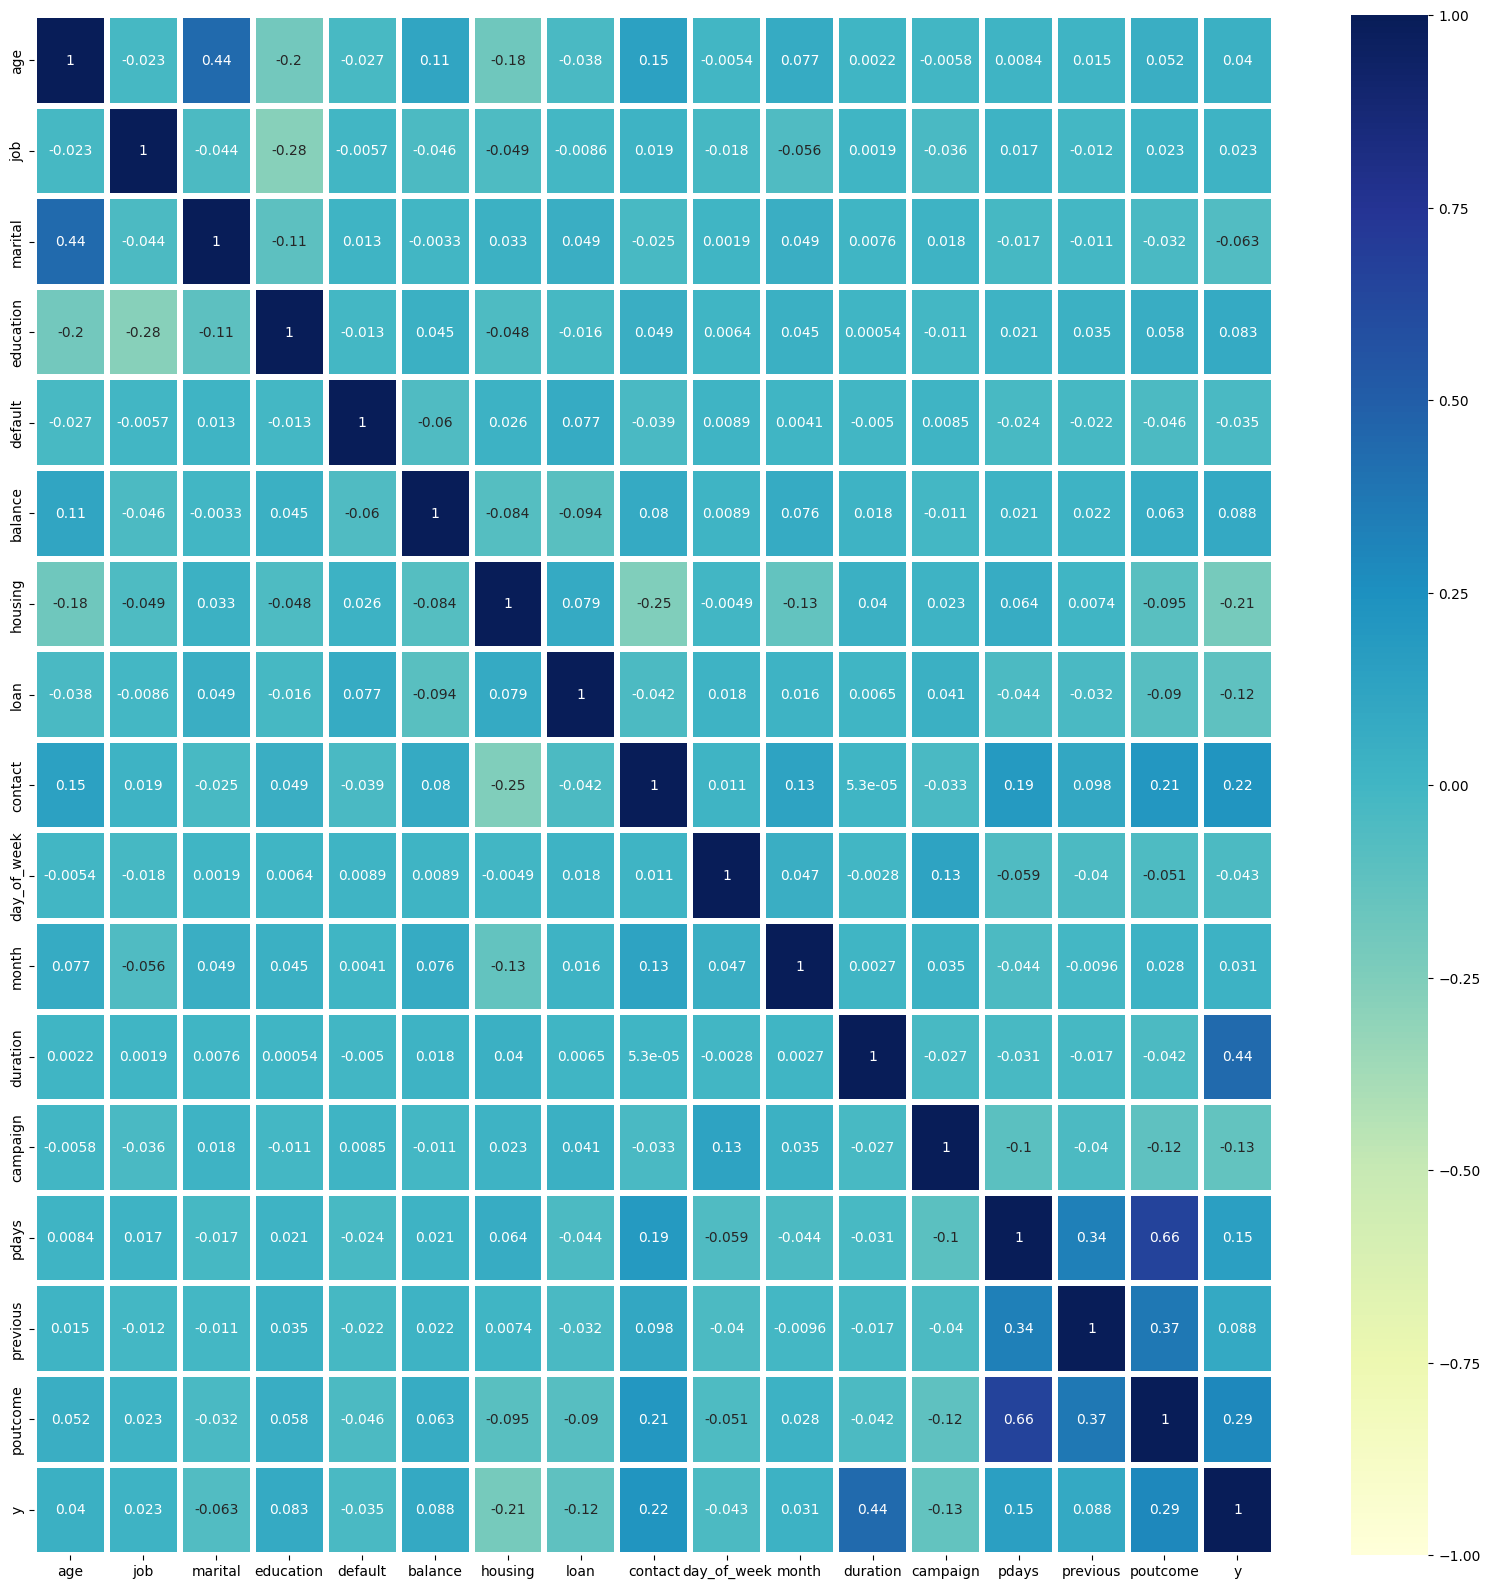

In [7]:
# correlation calculation
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center= 0, linewidths=3,cmap="YlGnBu")
plt.show()

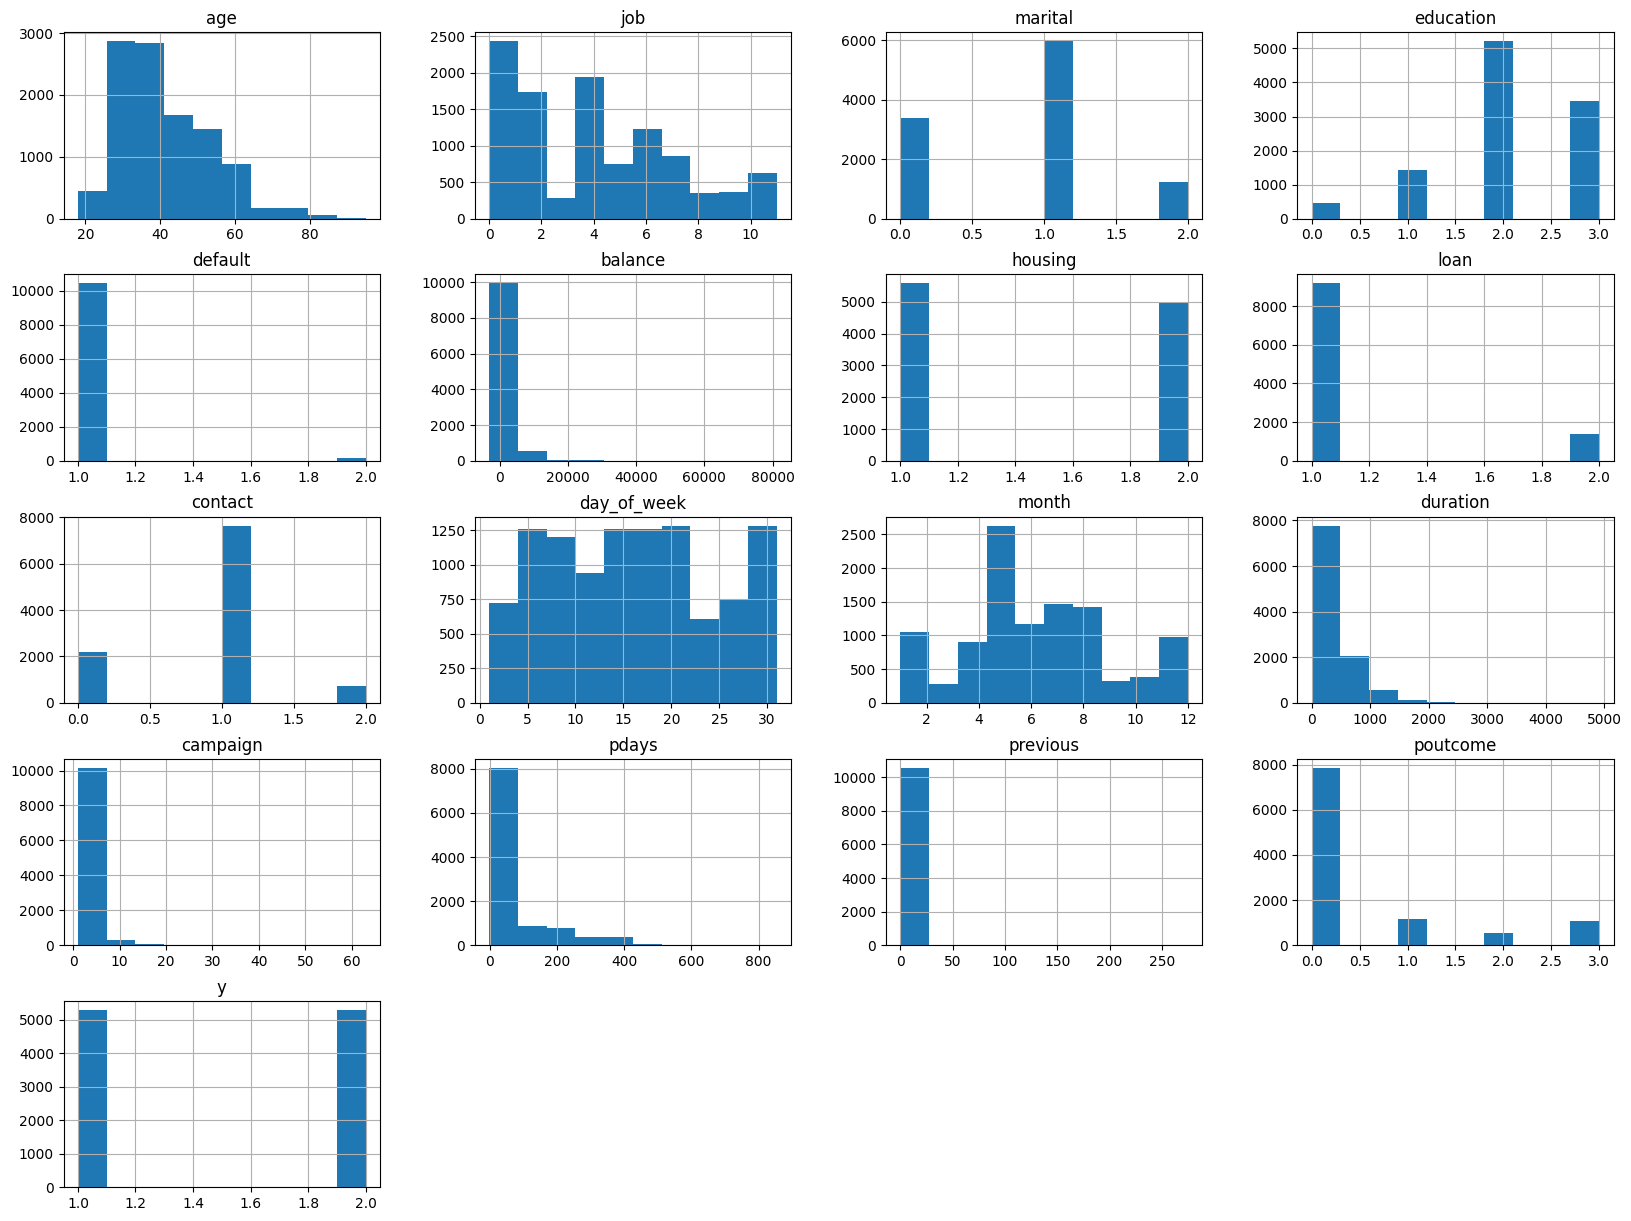

In [8]:
# plot features
df.hist(figsize=(20,15))
plt.show()


# 1.1 Implementing Logistic Regression with most correlated 2 features

###  Choose the two most correlated features with target feature 'y'

In [9]:
df['bias'] = 1
# replace 2 with 1 and 1 with 0 in y
df['y'] = df['y'].replace(1,0)
df['y'] = df['y'].replace(2,1)

In [10]:
# looking at above correlation figure, we can see that duration and poutcome have the highest correlation with y
X=df[['duration', 'poutcome','bias']]
y=df['y']

###  * Define your logistic regression model as class without using any built-in libraries
### * Define necessary functions such as sigmoid, fit, predict  (10 points)

In [11]:
class LogisticRegression:
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    def __call__(self,x):
        return self.sigmoid(np.dot(x,self.w))
    def predict(self,x):
        return (self.sigmoid(np.dot(x,self.w)) >= 0.5).astype(int)
    def update(self,X,y,lr):
        # X.shape is (m,n) y.shape is (n,1) w.shape is (n,1)
        y_hat = self.sigmoid(np.dot(X,self.w))
        self.w = self.w - lr * np.dot(X.T, y_hat - y)    
    def fit(self,X,y,lr=0.001,epochs=100):
        y = y.reshape(-1,1)
        self.w = np.zeros((X.shape[1],1))
        for i in range(epochs):
            self.update(X,y,lr)
        

# Scale the features using standard scaler

In [12]:
# scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_nump = scaler.fit_transform(X)

Split the dataset into a training set and a validation set (80% training and 20% validation).

In [13]:
# split data
y_nump = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_nump, y_nump, test_size=0.2, random_state=51)

* Initialize and train the custom logistic regression model

In [14]:
model = LogisticRegression()
model.fit(X_train,y_train)

* Make predictions on the validation set

In [15]:
y_pred = (model(X_test) >= 0.5).astype(int)

### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [16]:
def confusionMat(y_pred,y):
    # return numpy array of shape (2,2)
    ans = np.zeros((2,2))
    for i in range(len(y)):
        if y[i] == 1:
            if y_pred[i] == 1:
                ans[0][0] += 1
            else:
                ans[0][1] += 1
        else:
            if y_pred[i] == 1:
                ans[1][0] += 1
            else:
                ans[1][1] += 1
    return ans
def accuracy(confusionMat):
    return (confusionMat[0][0] + confusionMat[1][1]) / np.sum(confusionMat)
def precision(confusionMat):
    return confusionMat[0][0] / (confusionMat[0][0] + confusionMat[0][1])
def recall(confusionMat):   
    return confusionMat[0][0] / (confusionMat[0][0] + confusionMat[1][0])
def f1_score(confusionMat):
    return 2 * precision(confusionMat) * recall(confusionMat) / (precision(confusionMat) + recall(confusionMat))
confMat = confusionMat(y_pred,y_test)
print("Accuracy: ",accuracy(confMat))
print("Precision: ",precision(confMat))
print("Recall: ",recall(confMat))
print("F1 Score: ",f1_score(confMat))
print("Confusion Matrix: ",confMat)
# classfication report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy:  0.7589792060491494
Precision:  0.6725417439703154
Recall:  0.8219954648526077
F1 Score:  0.7397959183673468
Confusion Matrix:  [[725. 353.]
 [157. 881.]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.78      1038
           1       0.82      0.67      0.74      1078

    accuracy                           0.76      2116
   macro avg       0.77      0.76      0.76      2116
weighted avg       0.77      0.76      0.76      2116



### Print decision boundaries as in PA1 (5 points)

In [17]:
def plot_decision_boundary(X, y, model):
    # plot class 1 as blue points
    classOne = (y == 1).reshape(-1)
    classZero = (y == 0).reshape(-1)

    # plot the decision boundary
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape(-1,1), r2.reshape(-1,1)
    # horizontal stack vectors to create x1,x2 and bias
    grid = np.hstack((r1, r2, np.ones((r1.shape[0],1))))
    # make predictions
    # predictions = np.array([model(x) for x in grid])
    predictions = model.predict(grid)   
    # reshape the predictions back into a grid
    zz = predictions.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='cool',levels = 20, alpha=0.8)  

    # Scatter plots for each class with cool colors
    plt.scatter(X[classZero][:, 0], X[classZero][:, 1], color='blue', label='Class 0')  # Set color to purple for Class -1
    plt.scatter(X[classOne][:, 0], X[classOne][:, 1], color='purple', label='Class 1')      # Set color to blue for Class 1
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

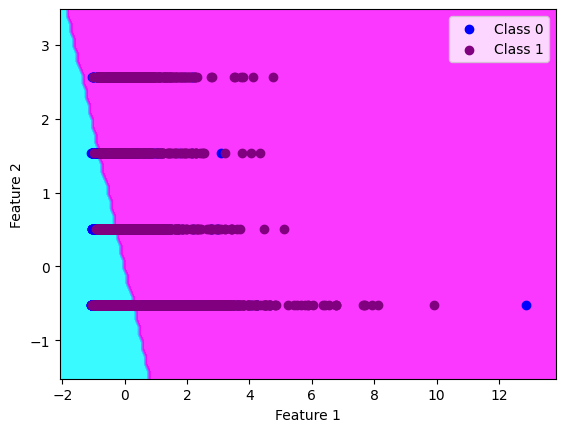

In [18]:
# plot the decision boundary
plot_decision_boundary(X_nump, y_nump, model)

# 1.2 Implementing Logistic Regression using all features.

* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

In [19]:
# X is everything except y
X = df.drop(columns=['y'])
y = df['y']

* Scale the features using StandardScaler

In [20]:
scaler = StandardScaler()
X_nump = scaler.fit_transform(X)

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [21]:
y_nump = y.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X_nump, y_nump, test_size=0.2, random_state=51)

### Initialize and train the custom logistic regression model.

In [22]:
fullModel = LogisticRegression()
fullModel.fit(x_train,y_train)

* Make predictions on the validation set

In [23]:
probs = fullModel(x_test)
y_pred = (probs >= 0.5).astype(int)

### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [24]:
# evaluate the model
confMat = confusionMat(y_pred,y_test)
print("Accuracy: ",accuracy(confMat))
print("Precision: ",precision(confMat))
print("Recall: ",recall(confMat))
print("F1 Score: ",f1_score(confMat))
print("Confusion Matrix: ",confMat)
# classfication report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy:  0.7854442344045368
Precision:  0.7430426716141002
Recall:  0.8190184049079755
F1 Score:  0.7791828793774319
Confusion Matrix:  [[801. 277.]
 [177. 861.]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1038
           1       0.82      0.74      0.78      1078

    accuracy                           0.79      2116
   macro avg       0.79      0.79      0.79      2116
weighted avg       0.79      0.79      0.79      2116



### Briefly explain the impact of the number of features on the learning ability of the model. (5 points)

Looking at the classification report, we can see that adding more features has increased both accurary, precision and recall values. This is because the model has more information to learn from. But considering the amount features we have added and the how little the increase in the values are, model might be overfitting.

# 2. Support Vector Machine Task  (30 points)

* Define your SVM model using sklearn

In [25]:
# SVM
import sklearn.svm as svm
from sklearn.metrics import accuracy_score

## 2.1 implementing svm with grid search cv using all features (10 points)

* Define features and target variable, you will use all features of dataset in this task

In [26]:
X = df.drop(columns=['y'])
y = df['y']

* Scale the features using StandardScaler

In [27]:
X_nump = scaler.fit_transform(X)
y_nump = y.to_numpy()

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_nump, y_nump, test_size=0.2, random_state=51)

#### Implement GridSearchCV  (5 points)

In [29]:
# grid search cv
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.598 total time=   2.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=   2.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   2.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=   1.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time=   2.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.806 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.813 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.798 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.794 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.790 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

* Initialize the SVM classifier

In [30]:
# initlize the svm with best parameters
best_params = grid.best_params_
svmModel = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

* Train the SVM classifier with the best parameters found from grid search


In [31]:
# fit the model
svmModel.fit(x_train, y_train)

SVC(C=1, gamma=0.1)

* Make predictions on the validation set using the best model


In [32]:
# predict
y_pred = svmModel.predict(x_test)

#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV  (5 points)

In [33]:
# evaluate the model
confMat = confusionMat(y_pred,y_test)
print("Accuracy: ",accuracy(confMat))
print("Precision: ",precision(confMat))
print("Recall: ",recall(confMat))
print("F1 Score: ",f1_score(confMat))
print("Confusion Matrix: ",confMat)
# classfication report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# best parameters
print("Best Parameters: ",best_params)

Accuracy:  0.8270321361058601
Precision:  0.8589981447124304
Recall:  0.8122807017543859
F1 Score:  0.8349864743011723
Confusion Matrix:  [[926. 152.]
 [214. 824.]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1038
           1       0.81      0.86      0.83      1078

    accuracy                           0.83      2116
   macro avg       0.83      0.83      0.83      2116
weighted avg       0.83      0.83      0.83      2116

Best Parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


## 2.2 implementing svm with most correlated 2 features (10 points)

#### Choose the two most correlated features with target feature 'y'

In [34]:
X = df[['duration', 'poutcome','bias']]
y = df['y']

* Scale the features using StandardScaler

In [35]:
# scale features
X_nump = scaler.fit_transform(X)
y_nump = y.to_numpy()

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_nump, y_nump, test_size=0.2, random_state=51)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [37]:
# initlize the svm with best parameters
svmModel = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

* Train the SVM classifier

In [38]:
# fit the model
svmModel.fit(x_train, y_train)

SVC(C=1, gamma=0.1)

* Make predictions on the validation set

In [39]:
# predict
y_pred = svmModel.predict(x_test)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [40]:
# evaluate the model
confMat = confusionMat(y_pred,y_test)
print("Accuracy: ",accuracy(confMat))
print("Precision: ",precision(confMat))
print("Recall: ",recall(confMat))
print("F1 Score: ",f1_score(confMat))
print("Confusion Matrix: ",confMat)
# classfication report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy:  0.7693761814744802
Precision:  0.735621521335807
Recall:  0.7961847389558233
F1 Score:  0.764705882352941
Confusion Matrix:  [[793. 285.]
 [203. 835.]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1038
           1       0.80      0.74      0.76      1078

    accuracy                           0.77      2116
   macro avg       0.77      0.77      0.77      2116
weighted avg       0.77      0.77      0.77      2116



##### Visualize decision boundary and support vectors (5 points)

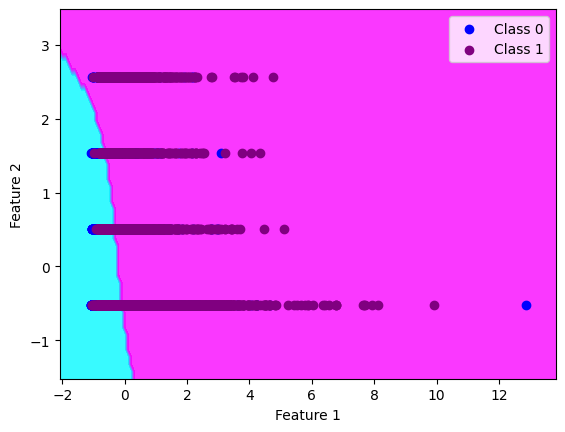

In [41]:
# plot the decision boundary
plot_decision_boundary(X_nump, y_nump, svmModel)

## 2.3 implementing svm with least correlated 2 features (10 points)

#### Choose the two least correlated features with target feature 'y'

In [42]:
# job and month are least correlated
X = df[['job', 'month','bias']]
y = df['y']

* Scale the features using StandardScaler

In [43]:
X_nump = scaler.fit_transform(X)
y_nump = y.to_numpy()

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_nump, y_nump, test_size=0.2, random_state=51)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [45]:
svmModel = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

* Train the SVM classifier

In [46]:
# fit the model
svmModel.fit(x_train, y_train)

SVC(C=1, gamma=0.1)

* Make predictions on the validation set

In [47]:
# predict
y_pred = svmModel.predict(x_test)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [48]:
# evaluate the model
confMat = confusionMat(y_pred,y_test)
print("Accuracy: ",accuracy(confMat))
print("Precision: ",precision(confMat))
print("Recall: ",recall(confMat))
print("F1 Score: ",f1_score(confMat))
print("Confusion Matrix: ",confMat)
# classfication report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy:  0.5732514177693762
Precision:  0.41280148423005564
Recall:  0.6223776223776224
F1 Score:  0.49637479085331837
Confusion Matrix:  [[445. 633.]
 [270. 768.]]
              precision    recall  f1-score   support

           0       0.55      0.74      0.63      1038
           1       0.62      0.41      0.50      1078

    accuracy                           0.57      2116
   macro avg       0.59      0.58      0.56      2116
weighted avg       0.59      0.57      0.56      2116



##### Visualize decision boundary and support vectors(5 points)

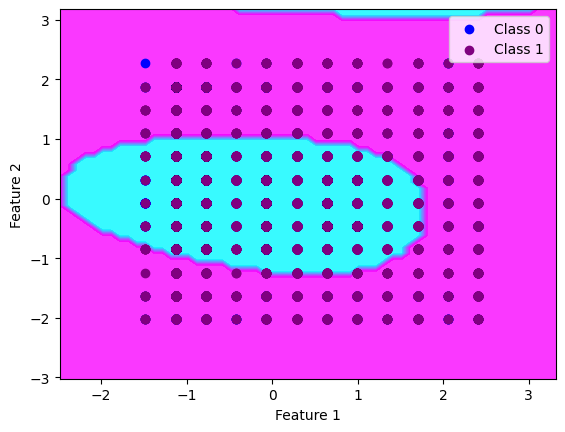

In [49]:
# plot the decision boundary
plot_decision_boundary(X_nump, y_nump, svmModel)

### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table. (5 points)

# 3. Decision Tree Task (30 points)

* Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

### Download the dataset from https://drive.google.com/file/d/1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv/view?usp=sharing

### import other necessary libraries

In this assignment, in multi-class classification task first you will explore the De-
cision Tree algorithm by implementing it for a multi class classification task using
the Weights Dataset. The dataset consists of data collected from 3,360 individuals
aged 20 and over, comprising 9 (’BMI_CLASS’, ’UNIT_NUM’, ’STUB_NAME_NUM’,
’STUB_LABEL_NUM’, ’YEAR_NUM’, ’AGE_NUM’, ’ESTIMATE’, ’SE’, ’FLAG’) fea-
tures and 6 discrete classes (’BMI_CLASS’ feature is the label feature). Each of the BMI
classes is distributed equally. You will classify which BMI class a person belongs to among
the six classes.

In [96]:
df=pd.read_csv("weights_bmi_6classes_updated.csv", encoding="utf-8")

* Define features and target variable, you will use all features of dataset in this task

In [141]:
X = df[['UNIT_NUM','STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM', 'ESTIMATE', 'SE', 'FLAG']]
y = df['BMI_CLASS']
X = X.replace('*',2)
X = X.replace('.',1)
X = X.replace('---',0)

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [152]:
X_nump = X.to_numpy()
y_nump = y.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X_nump, y_nump, test_size=0.2, random_state=5)

* Initialize the Decision Tree classifier

In [153]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=423,min_impurity_decrease=0.01,max_depth=15)

* Train the Decision Tree classifier

In [154]:
# fit the model
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, min_impurity_decrease=0.01,
                       random_state=423)

* Make predictions on the validation set

In [155]:
# predict
y_pred = dt.predict(x_test)

#### Evaluate the model's performance, print classification report and confusion matrix  (10 points)

In [156]:
# evaluate the model
confMat = confusionMat(y_pred,y_test)
print("Accuracy: ",accuracy(confMat))
print("Precision: ",precision(confMat))
print("Recall: ",recall(confMat))
print("F1 Score: ",f1_score(confMat))
print("Confusion Matrix: ",confMat)
# classfication report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy:  0.8571428571428571
Precision:  0.42201834862385323
Recall:  0.5822784810126582
F1 Score:  0.48936170212765956
Confusion Matrix:  [[ 46.  63.]
 [ 33. 530.]]
              precision    recall  f1-score   support

           1       0.58      0.42      0.49       109
           2       0.98      0.83      0.90       109
           3       0.80      0.53      0.64       113
           4       0.66      0.81      0.73       115
           5       0.66      0.58      0.62       111
           6       0.47      0.77      0.58       115

    accuracy                           0.66       672
   macro avg       0.69      0.66      0.66       672
weighted avg       0.69      0.66      0.66       672



#### Visualize the Decision Tree, show clearly class number, gini value etc.  (10 points)


In [157]:
# Visualize the Decision Tree, show clearly class number, gini value etc.
from sklearn.tree import plot_tree
plt.figure(figsize=(180,180))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0','1','2','3','4','5'])
plt.show()

### Explain briefly the question. What is the role of gini in decision tree? (10 points)

Gini impurity is a measure similar to entropy that quantifies the disorder of a set of elements. It is calculated by summing the probability of an element being chosen times the probability of a mistake in categorizing that element. The Gini impurity is used to decide which feature to split on at each step in building the decision tree. The feature that results in the lowest Gini impurity is chosen as the splitting feature.